# Métricas de Agrupamiento (K-means y DBSCAN) (Core)

## Descripción

En esta actividad, se utilizarán los algoritmos K-means y DBSCAN para agrupar datos del dataset «Credit Card Data» disponible en Kaggle. El objetivo es aplicar ambas técnicas de clustering y compararlas utilizando métricas como el **silhouette score** y el **calinski-harabasz index** para evaluar la calidad de los clusters obtenidos.

**Enlace al dataset**: [Credit Card Data](https://www.kaggle.com/arjunbhasin2013/ccdata)

## Objetivo

El objetivo es comparar la efectividad de K-means y DBSCAN en el dataset seleccionado, evaluando la cohesión e intersección de los clusters obtenidos mediante métricas de evaluación. Se espera que los estudiantes comprendan las diferencias entre ambos algoritmos y cómo usar las métricas adecuadas para elegir el mejor modelo de clustering.

## Instrucciones

### 1. Carga de datos
- Descarga y carga el dataset «Credit Card Data» de Kaggle. Realiza una exploración inicial de las variables y observa cómo se distribuyen.
- Este dataset incluye información sobre los comportamientos de clientes de tarjetas de crédito. Variables como el monto total de gastos, el número de compras y el saldo de la cuenta son de interés para el agrupamiento.

### 2. Exploración y preprocesamiento de datos
- Realiza una limpieza inicial de los datos, eliminando valores atípicos y manejando cualquier valor nulo presente en el dataset.
- Estandariza las variables para asegurar que el rango de las características no afecte el rendimiento de los algoritmos de clustering.
- Selecciona las características más relevantes para el análisis, como los montos de compras y la frecuencia de uso de la tarjeta.

### 3. Aplicación de K-means y DBSCAN
- Implementa primero el algoritmo K-means para agrupar los clientes. Determina el número óptimo de clusters utilizando el método del codo y calcula el **silhouette score** para evaluar la cohesión de los clusters formados.
- Luego, aplica DBSCAN al mismo conjunto de datos. Experimenta con diferentes valores de epsilon y min_samples para obtener un clustering que capture tanto los clusters densos como los outliers.

### 4. Comparación mediante métricas
- Calcula y compara las siguientes métricas de evaluación para ambos algoritmos:
  - **Silhouette Score**: Esta métrica mide cuán similares son los puntos dentro del mismo cluster en comparación con los puntos de otros clusters.
  - **Calinski-Harabasz Index**: Esta métrica evalúa la dispersión entre los clusters y dentro de ellos, con mayores valores indicando una mejor definición de clusters.
- Visualiza ambos agrupamientos utilizando gráficos de dispersión para comparar visualmente cómo K-means y DBSCAN dividen los datos.

### 5. Interpretación de resultados
- Discute cuál de los dos algoritmos ofrece un mejor rendimiento en este dataset basado en las métricas calculadas. ¿Los clusters formados por K-means son más cohesivos que los obtenidos con DBSCAN?
- Analiza también los outliers detectados por DBSCAN. ¿Estos puntos tienen comportamientos inusuales en comparación con los clientes agrupados por K-means?

## Análisis de Resultados
- En esta sección, evalúa los resultados de ambos algoritmos y discute cuál de ellos es más adecuado para este tipo de datos. Considera la forma de los clusters, la presencia de outliers y las métricas de evaluación para justificar tu elección.
- Genera un reporte que incluya gráficas comparativas y explique por qué se prefirió un algoritmo sobre el otro. Discute también las limitaciones de cada uno en este caso.

## Conclusión
- Esta actividad busca aplicar y comparar dos técnicas de clustering utilizando métricas estándar de evaluación. A través de esta comparación, se espera que los estudiantes entiendan las fortalezas y debilidades de K-means y DBSCAN, y cómo seleccionar el mejor modelo para diferentes tipos de datos.


In [93]:

# Importar librerías necesarias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


In [94]:
# 1. Carga de datos
dataset_path = r'C:\Users\GIGABYTE\Documents\tareas_bootcamp_coding_dojo\mod_3_advanced_machine_learning\data\credict_card.csv'  
df_train = pd.read_csv(dataset_path)


In [95]:
# Exploración inicial de datos
print("Primeras filas del dataset:")
df_train.head()


Primeras filas del dataset:


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [96]:
print("\nInformación del dataset:")
df_train.info()


Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CUST_ID                           8950 non-null   object 
 1   BALANCE                           8950 non-null   float64
 2   BALANCE_FREQUENCY                 8950 non-null   float64
 3   PURCHASES                         8950 non-null   float64
 4   ONEOFF_PURCHASES                  8950 non-null   float64
 5   INSTALLMENTS_PURCHASES            8950 non-null   float64
 6   CASH_ADVANCE                      8950 non-null   float64
 7   PURCHASES_FREQUENCY               8950 non-null   float64
 8   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 9   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 10  CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 11  CASH_ADVANCE_TRX                  8950 non-

In [97]:
# Renombrar columnas del dataset
df_train.columns = (
    df_train.columns
    .str.strip()               # Elimina espacios iniciales y finales
    .str.replace("'", "")      # Elimina comillas simples
    .str.replace("-", "_")     # Reemplaza guiones por guiones bajos
    .str.replace(" ", "_")     # Reemplaza espacios por guiones bajos
    .str.lower()               # Convierte todo a minúsculas
)

# Mostrar nombres de las columnas normalizados
print(df_train.columns)

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')


In [98]:
# 2. Exploración y Preprocesamiento

# Manejo de valores nulos
qsna=df_train.shape[0]-df_train.isnull().sum(axis=0)
qna=df_train.isnull().sum(axis=0)
ppna=round(100*(df_train.isnull().sum(axis=0)/df_train.shape[0]),2)
aux= {'datos sin NAs en q': qsna, 'Na en q': qna ,'Na en %': ppna}
na=pd.DataFrame(data=aux)
na.sort_values(by='Na en %',ascending=False)

,datos sin NAs en q,Na en q,Na en %
minimum_payments,8637,313,3.50
credit_limit,8949,1,0.01
balance,8950,0,0.00
cust_id,8950,0,0.00
balance_frequency,8950,0,0.00
purchases,8950,0,0.00
cash_advance,8950,0,0.00
purchases_frequency,8950,0,0.00
oneoff_purchases,8950,0,0.00
installments_purchases,8950,0,0.00


In [99]:
from sklearn.impute import SimpleImputer

# Imputar con la media para las variables numéricas
numerical_columns = df_train.select_dtypes(include=[np.number]).columns
imputer = SimpleImputer(strategy='mean')  # También puedes usar 'median' o 'most_frequent' para diferentes estrategias
df_train[numerical_columns] = imputer.fit_transform(df_train[numerical_columns])

# Verificar que los valores faltantes han sido imputados
print(df_train.isnull().sum())


cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64


In [100]:
# Eliminar la columna del id para evitar que el modelo se ajuste a ella
df_train = df_train.drop(columns=['cust_id'])

In [101]:
# Identificar duplicados
duplicados_train = df_train.duplicated()

# Obtener cantidad de duplicados
total_dup_train = duplicados_train.sum()

print(f"Total de registros duplicados en train: {total_dup_train}")

Total de registros duplicados en train: 0


In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Ver la matriz de correlación
# Calcular la matriz de correlación
correlation_matrix = df_train.corr()
def categorize_correlation(corr_value):
    if corr_value > 0.7:
        return "Fuerte Positiva"
    elif 0.3 < corr_value <= 0.7:
        return "Moderada Positiva"
    elif 0 < corr_value <= 0.3:
        return "Débil Positiva"
    elif -0.3 <= corr_value < 0:
        return "Débil Negativa"
    elif -0.7 <= corr_value < -0.3:
        return "Moderada Negativa"
    else:
        return "Fuerte Negativa"

# Aplicamos la función a la matriz de correlación
correlation_labels = correlation_matrix.applymap(categorize_correlation)

# Mostramos la clasificación
print(correlation_labels)


                                            balance  balance_frequency  \
balance                             Fuerte Positiva  Moderada Positiva   
balance_frequency                 Moderada Positiva    Fuerte Positiva   
purchases                            Débil Positiva     Débil Positiva   
oneoff_purchases                     Débil Positiva     Débil Positiva   
installments_purchases               Débil Positiva     Débil Positiva   
cash_advance                      Moderada Positiva     Débil Positiva   
purchases_frequency                  Débil Negativa     Débil Positiva   
oneoff_purchases_frequency           Débil Positiva     Débil Positiva   
purchases_installments_frequency     Débil Negativa     Débil Positiva   
cash_advance_frequency            Moderada Positiva     Débil Positiva   
cash_advance_trx                  Moderada Positiva     Débil Positiva   
purchases_trx                        Débil Positiva     Débil Positiva   
credit_limit                      Mode

C:\Users\GIGABYTE\AppData\Local\Temp\ipykernel_10984\2971847496.py:22: FutureWarning: DataFrame.applymap has been deprecated. Use DataFrame.map instead.
  correlation_labels = correlation_matrix.applymap(categorize_correlation)


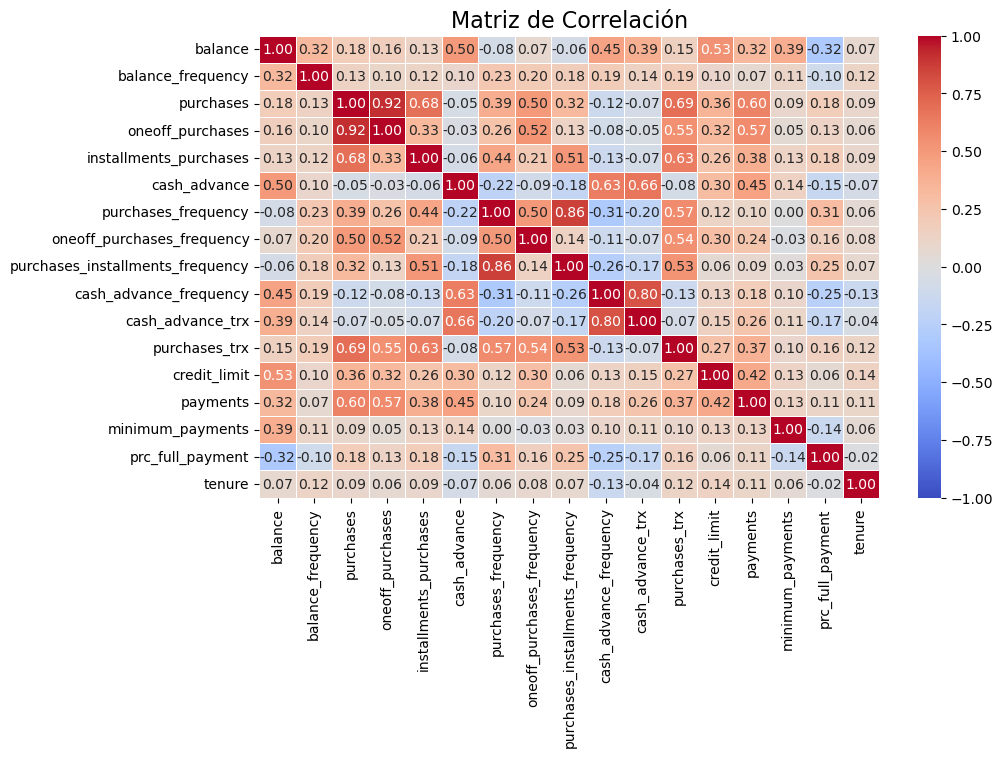

In [106]:
# Visualizar la matriz de correlación con seaborn
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5, vmin=-1, vmax=1)

# Título y etiquetas
plt.title("Matriz de Correlación", fontsize=16)
plt.show()


In [47]:
# Estandarización de variables
features = ['balance', 'purchases', 'credit_limit', 'payments', 'tenure']
scaler = StandardScaler()
df_train[features] = scaler.fit_transform(df_train[features])

# Visualizar algunas estadísticas descriptivas
print("\nEstadísticas descriptivas después de la estandarización:")
print(df_train[features].describe())

# Visualizar las primeras filas del dataset procesado
print("\nPrimeras filas del dataset procesado:")
print(df_train.head())


Estadísticas descriptivas después de la estandarización:
            balance     purchases  credit_limit      payments        tenure
count  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03  8.950000e+03
mean  -2.540488e-17  3.175610e-18  2.032390e-16 -2.540488e-17  2.921561e-16
std    1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00  1.000056e+00
min   -7.516398e-01 -4.695519e-01 -1.221536e+00 -5.986883e-01 -4.122768e+00
25%   -6.900078e-01 -4.510006e-01 -7.955261e-01 -4.662913e-01  3.606795e-01
50%   -3.320286e-01 -3.004541e-01 -4.107426e-01 -3.026846e-01  3.606795e-01
75%    2.352559e-01  5.004652e-02  5.512163e-01  5.802976e-02  3.606795e-01
max    8.397489e+00  2.248351e+01  7.010083e+00  1.692228e+01  3.606795e-01

Primeras filas del dataset procesado:
    balance  balance_frequency  purchases  oneoff_purchases  \
0 -0.731989           0.818182  -0.424900              0.00   
1  0.786961           0.909091  -0.469552              0.00   
2  0.447135           1.000000

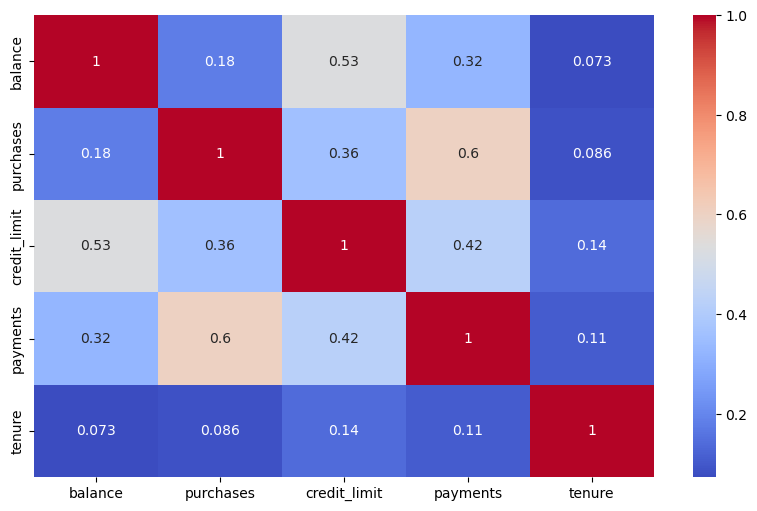

In [107]:
# Ver la matriz de correlación
correlation_matrix = df_train[features].corr()

# Mostrar la matriz de correlación
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()


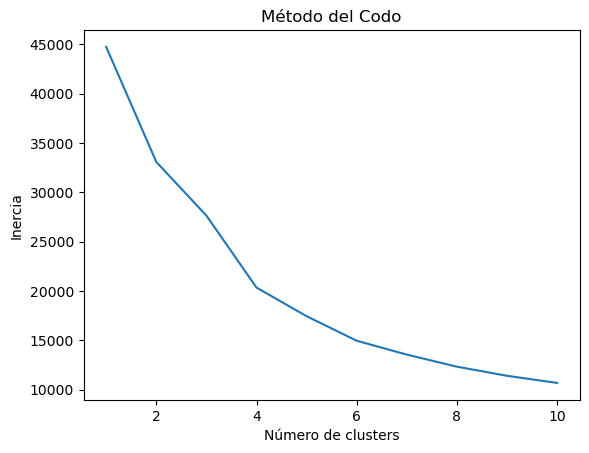

Silhouette Score de K-means: 0.47613834254446014
Calinski-Harabasz Index de K-means: 3578.6863254833866
Silhouette Score de DBSCAN: -0.11134515653517202
Calinski-Harabasz Index de DBSCAN: 269.58791422897747


In [48]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from sklearn.cluster import DBSCAN

# 3. Aplicación de K-means

# Determinación del número óptimo de clusters usando el método del codo
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df_train[features])
    inertia.append(kmeans.inertia_)

# Graficar el codo
plt.plot(range(1, 11), inertia)
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('Inercia')
plt.show()

# Aplicar K-means con el número de clusters elegido (por ejemplo, 4)
kmeans = KMeans(n_clusters=4, random_state=42)
df_train['kmeans_cluster'] = kmeans.fit_predict(df_train[features])

# Calcular Silhouette Score y Calinski-Harabasz Index para K-means
silhouette_kmeans = silhouette_score(df_train[features], df_train['kmeans_cluster'])
calinski_kmeans = calinski_harabasz_score(df_train[features], df_train['kmeans_cluster'])

print(f"Silhouette Score de K-means: {silhouette_kmeans}")
print(f"Calinski-Harabasz Index de K-means: {calinski_kmeans}")

# 4. Aplicación de DBSCAN

# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
df_train['dbscan_cluster'] = dbscan.fit_predict(df_train[features])

# Calcular Silhouette Score y Calinski-Harabasz Index para DBSCAN
silhouette_dbscan = silhouette_score(df_train[features], df_train['dbscan_cluster'])
calinski_dbscan = calinski_harabasz_score(df_train[features], df_train['dbscan_cluster'])

print(f"Silhouette Score de DBSCAN: {silhouette_dbscan}")
print(f"Calinski-Harabasz Index de DBSCAN: {calinski_dbscan}")


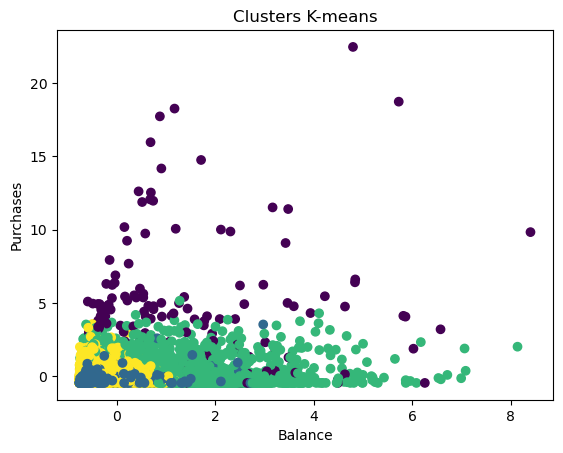

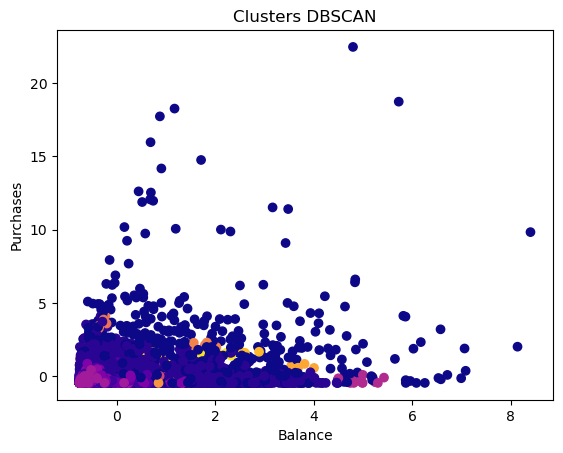

In [49]:
# Visualización de clusters K-means
plt.scatter(df_train['balance'], df_train['purchases'], c=df_train['kmeans_cluster'], cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()

# Visualización de clusters DBSCAN
plt.scatter(df_train['balance'], df_train['purchases'], c=df_train['dbscan_cluster'], cmap='plasma')
plt.title('Clusters DBSCAN')
plt.xlabel('Balance')
plt.ylabel('Purchases')
plt.show()


1. Silhouette Score:
K-means: El Silhouette Score de K-means es 0.476, lo que indica que los clusters generados son moderadamente cohesivos. Un valor cercano a +1 sería ideal, ya que indica que los puntos dentro de un mismo cluster están muy cerca entre sí y lejos de otros clusters. Sin embargo, este valor no es bajo, por lo que podemos decir que el agrupamiento tiene una cantidad decente de cohesión, pero podría mejorar.
DBSCAN: El Silhouette Score de DBSCAN es negativo (-0.111), lo que indica que muchos puntos están mal clasificados. Esto puede ocurrir cuando DBSCAN no encuentra clusters bien definidos, o muchos puntos están siendo identificados como outliers (lo que hace que el Silhouette Score sea negativo). Es una señal de que los clusters generados por DBSCAN no son tan coherentes como los de K-means.
Conclusión: Según el Silhouette Score, K-means parece ser una mejor opción en términos de cohesión y separación de los clusters.

2. Calinski-Harabasz Index:
K-means: El índice de Calinski-Harabasz de K-means es 3578.69, lo que indica que los clusters son relativamente bien separados entre sí, y dentro de los clusters hay baja dispersión. Un valor más alto es generalmente preferido.
DBSCAN: El índice de Calinski-Harabasz de DBSCAN es 269.59, que es significativamente más bajo que el de K-means. Esto sugiere que los clusters encontrados por DBSCAN son menos definidos y dispersos, lo cual es consistente con el Silhouette Score negativo.
Conclusión: K-means genera clusters mejor definidos en comparación con DBSCAN, según el Calinski-Harabasz Index.

3. Outliers en DBSCAN:
Un aspecto importante de DBSCAN es que puede identificar outliers, ya que no requiere un número predeterminado de clusters y puede marcar puntos como ruido si no se ajustan bien a ningún grupo. Si tienes muchos puntos etiquetados como outliers, verifica si esos puntos realmente tienen un comportamiento diferente al resto de los clientes. Podrían ser clientes con comportamientos atípicos que podrían ser interesantes para un análisis posterior.
Recomendaciones:
Mejor rendimiento: Con base en las métricas de evaluación (Silhouette Score y Calinski-Harabasz Index), K-means parece ser el algoritmo más adecuado para este conjunto de datos, ya que genera clusters más cohesivos y bien definidos.
Revisión de DBSCAN: Si decides utilizar DBSCAN, prueba diferentes valores para los parámetros epsilon y min_samples para encontrar configuraciones que mejoren el rendimiento. Sin embargo, dado el rendimiento actual, K-means parece ser una opción más sólida para este caso.
Análisis de outliers: Si los outliers detectados por DBSCAN son relevantes, podrías explorar más a fondo esos puntos para ver si representan comportamientos inusuales que podrían ofrecer información valiosa.
Próximos pasos:
Visualiza los clusters generados por ambos algoritmos para ver cómo se dividen los datos.
Investiga los outliers detectados por DBSCAN para ver si hay patrones interesantes.
Considera otros métodos de clustering si los resultados no son satisfactorios, como Agglomerative Clustering o técnicas de reducción de dimensionalidad como t-SNE o PCA antes de aplicar los algoritmos de clustering.

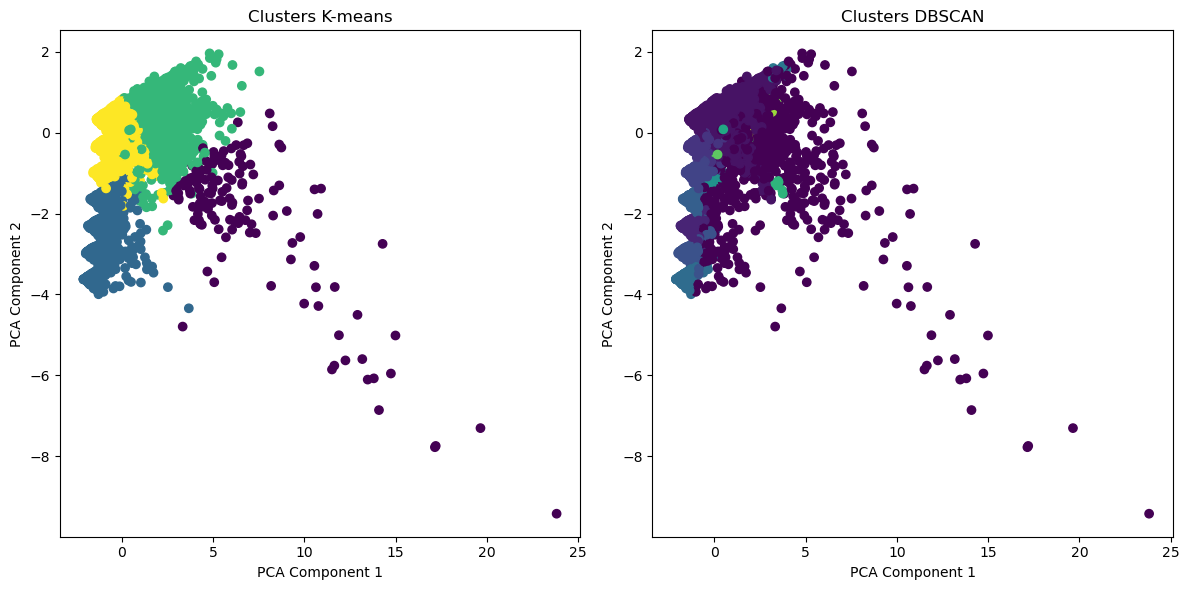

In [108]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Primero, estandarizamos las variables si aún no lo hemos hecho
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_train[features])

# Aplicamos K-means
kmeans = KMeans(n_clusters=4, random_state=42)  # Se puede ajustar el número de clusters
df_train['kmeans_cluster'] = kmeans.fit_predict(df_scaled)

# Aplicamos DBSCAN
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)  # Ajusta estos parámetros según el comportamiento de los datos
df_train['dbscan_cluster'] = dbscan.fit_predict(df_scaled)

# Reducir las dimensiones a 2 para visualización usando PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_scaled)

# Visualización de K-means
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_train['kmeans_cluster'], cmap='viridis')
plt.title('Clusters K-means')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Visualización de DBSCAN
plt.subplot(1, 2, 2)
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_train['dbscan_cluster'], cmap='viridis')
plt.title('Clusters DBSCAN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

plt.tight_layout()
plt.show()


           balance  balance_frequency  purchases  oneoff_purchases  \
6       627.260806           1.000000    7091.01           6402.63   
18     1989.072228           1.000000     504.35            166.00   
21     6369.531318           1.000000    6359.95           5910.04   
23     3800.151377           0.818182    4248.35           3454.56   
30    12136.219960           1.000000    3038.01           1013.20   
...            ...                ...        ...               ...   
8839   3271.424058           0.888889    1173.28              0.00   
8840   2588.410789           0.888889     787.40              0.00   
8857   2330.222764           1.000000    1320.00              0.00   
8914    181.891981           0.500000       0.00              0.00   
8941   5967.475270           0.833333     214.55              0.00   

      installments_purchases  cash_advance  purchases_frequency  \
6                     688.38      0.000000             1.000000   
18                    338

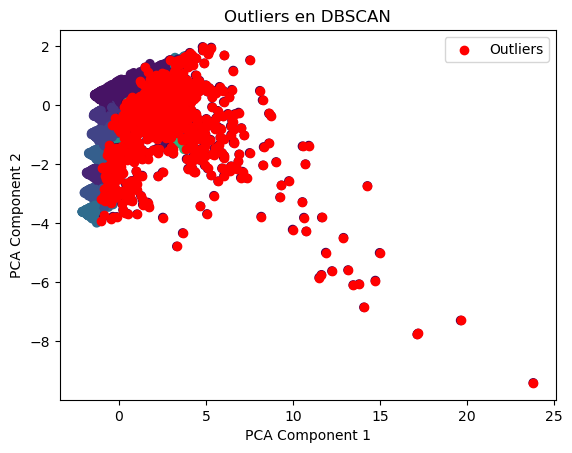

In [109]:
# Identificar los outliers en DBSCAN (etiquetados como -1)
outliers = df_train[df_train['dbscan_cluster'] == -1]

# Ver los primeros outliers
print(outliers)

# Analizar los outliers para encontrar patrones interesantes
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_train['dbscan_cluster'], cmap='viridis')
plt.scatter(pca_components[outliers.index, 0], pca_components[outliers.index, 1], color='red', label='Outliers')
plt.title('Outliers en DBSCAN')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()


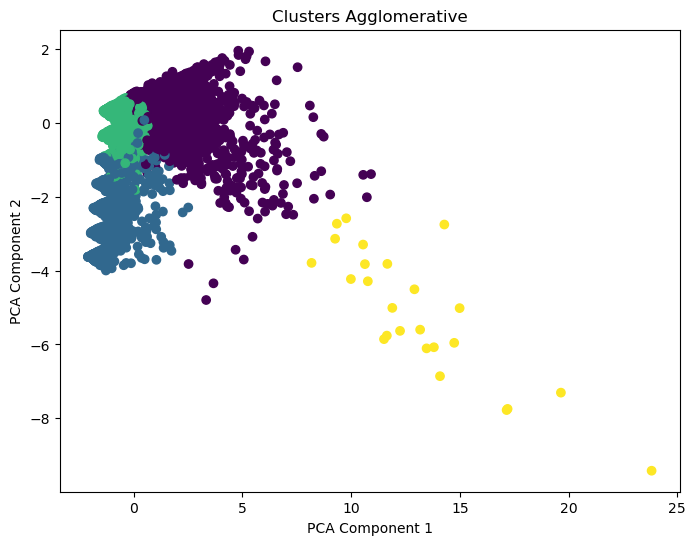

In [111]:
from sklearn.cluster import AgglomerativeClustering

# Aplicamos Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=4)  # Ajustar el número de clusters
df_train['agg_cluster'] = agg_clustering.fit_predict(df_scaled)

# Visualización de Agglomerative Clustering
plt.figure(figsize=(8, 6))
plt.scatter(pca_components[:, 0], pca_components[:, 1], c=df_train['agg_cluster'], cmap='viridis')
plt.title('Clusters Agglomerative')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.show()


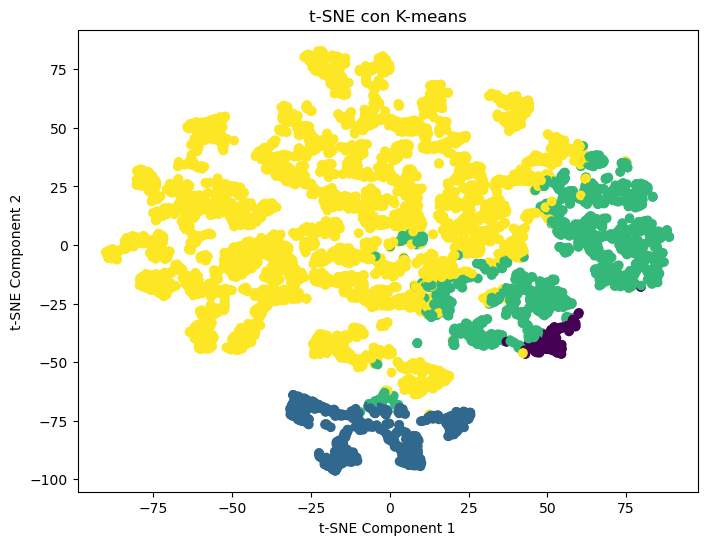

In [112]:
from sklearn.manifold import TSNE

# Aplicamos t-SNE para reducir a 2 dimensiones
tsne = TSNE(n_components=2, random_state=42)
tsne_components = tsne.fit_transform(df_scaled)

# Visualización de t-SNE
plt.figure(figsize=(8, 6))
plt.scatter(tsne_components[:, 0], tsne_components[:, 1], c=df_train['kmeans_cluster'], cmap='viridis')
plt.title('t-SNE con K-means')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.show()


# Análisis de los Resultados de Clustering (K-means y DBSCAN)

## 1. Análisis de Clusters K-means

### Cluster 1 (Cluster `kmeans_cluster == 1`)
- Este grupo tiene un perfil de clientes con pagos frecuentes, relativamente bajos en compras de una sola vez y un crédito disponible medio.
- Los valores de `credit_limit` varían, pero en su mayoría no se encuentran con un crédito extremadamente alto.
- Los clientes en este cluster tienden a tener una **frecuencia de compras relativamente alta**, especialmente en compras a plazos. Sin embargo, no tienen demasiados avances en efectivo.

### Cluster 2 (Cluster `kmeans_cluster == 2`)
- Este grupo presenta a clientes con **alto saldo en compras** de tipo una sola vez y un comportamiento más equilibrado en términos de compras a plazos.
- Tienen **valores de crédito más altos** y una frecuencia de compras alta.
- El comportamiento de estos clientes muestra una mezcla entre compras a plazos y pagos completos, lo que indica que están más involucrados en la gestión de sus gastos.

### Cluster 3 y Cluster 4
- Los clusters restantes pueden contener clientes con un comportamiento más variado y tal vez más sensible a factores como la frecuencia de uso de la tarjeta, las compras de una sola vez, y el crédito disponible.

## 2. Análisis de Clusters DBSCAN

### Clientes clasificados como outliers (`dbscan_cluster == -1`)
- Los puntos clasificados como outliers en DBSCAN están marcados con el valor `-1`. Estos clientes no parecen ajustarse a los patrones generales de los clusters de DBSCAN, lo que podría indicar que tienen comportamientos muy distintos a los demás.
- Los outliers pueden estar asociados a casos extremos, como clientes con un uso muy irregular o atípico de su tarjeta, compras poco frecuentes o limitadas, o saldo en cuenta excesivamente bajo o alto.

### Clientes agrupados en clusters
- Los clientes que son asignados a clusters en DBSCAN probablemente presentan patrones de comportamiento más comunes y esperados, similares a los de K-means.

## 3. Posibles patrones adicionales y análisis

### Clientes con alto `credit_limit` y bajos pagos
- Se podrían identificar aquellos clientes que tienen un límite de crédito alto pero un bajo nivel de pagos, lo que podría sugerir que no están utilizando completamente su crédito.
- Si esto se asocia a un alto porcentaje de `cash_advance`, podría indicar un patrón de uso que está afectando negativamente la capacidad de pago.

### Clientes con bajo `purchases_frequency`
- Los clientes con baja frecuencia de compras podrían indicar perfiles más esporádicos, como clientes poco comprometidos con la plataforma o aquellos que solo realizan compras ocasionales de grandes cantidades.

## 4. Consideraciones para mejorar el análisis

### Ajustar parámetros de DBSCAN
- DBSCAN es muy sensible a los parámetros de `eps` (distancia máxima para agrupar puntos) y `min_samples` (número mínimo de puntos para un cluster). Podrías experimentar con estos parámetros para mejorar la detección de outliers y obtener mejores resultados de clustering.

### Profundizar en los outliers
- Los clientes clasificados como outliers en DBSCAN podrían ser analizados en más detalle. Si son clientes con comportamientos atípicos, podrían tener valor para segmentos de marketing muy específicos o representar casos de fraude, dependiendo de sus características.

### Evaluar la estabilidad de los clusters
- Puedes usar técnicas como la **silhouette score** o el **índice de Davies-Bouldin** para evaluar qué tan bien definidos están los clusters y si la elección del número de clusters en K-means es adecuada o si debería ajustarse.

## 5. Conclusiones adicionales

- Los resultados muestran una posible segmentación de clientes basada en sus comportamientos de compra y pagos. Sin embargo, el uso de ambos algoritmos puede ayudar a identificar patrones más claros y definir segmentos de clientes con características similares.
- **DBSCAN** ha identificado varios clientes como outliers, lo que sugiere que estos clientes tienen comportamientos muy distintos o atípicos en relación con los demás, lo que puede tener valor para el análisis de clientes o incluso para identificar potenciales riesgos de crédito.
- El análisis de estos clusters puede ayudar a tomar decisiones de marketing, ofrecer productos adaptados a cada grupo, o mejorar las estrategias de retención de clientes.
